In [1]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 113MB/s]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/hr.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14999,0.71,0.66,5,187,2,0,0,0,sales,medium,NaN
15000,0.75,0.84,3,145,3,1,0,0,support,low,NaN
15001,0.32,0.41,3,138,3,1,0,0,technical,medium,29.0
15002,0.62,0.58,3,148,2,1,0,0,technical,low,NaN


In [5]:
df.shape

(15004, 11)

We have 15004 records in our dataset.

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
age                      float64
dtype: object

In [8]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

Among 15004 records there are 29 null values in Salary column and 11924 null values in age column which is more than 70% of data in age column are missing. Therefore we will drop age column and fill null values in salary column with mean value.



In [9]:
import seaborn as sns

<Axes: >

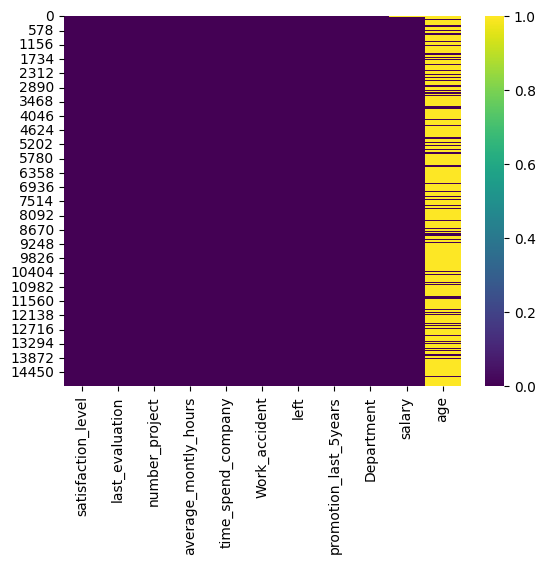

In [12]:
sns.heatmap(df.isnull(), cmap='viridis')

# Dropping age column


In [14]:
df.drop(columns = ['age'], inplace = True)

In [15]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,IT,low
1,0.40,0.49,2,155,3,0,1,0,hr,medium
2,0.45,0.45,2,154,3,1,1,0,support,medium
3,0.46,0.73,6,256,4,0,0,0,product_mng,high
4,0.14,0.54,5,275,4,1,0,0,sales,high


# Filling null values with most frequent values in salary column using SimpleImputer from sklear library.

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
impute_mode = SimpleImputer(strategy='most_frequent')
impute_mode.fit(df[['salary']])

df[['salary']] = impute_mode.transform(df[['salary']])

In [25]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

We have filled all the null values in salary column in the HR dataframe.